In [ ]:
import cv2
from PIL import Image
from google.colab import files

# Upload Image
uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

# Read Image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

def compress_image_lossy(input_path, output_path, quality=50):
    """Compress image using JPEG (lossy compression)"""
    image = cv2.imread(input_path)
    cv2.imwrite(output_path, image, [cv2.IMWRITE_JPEG_QUALITY, quality])

def compress_image_lossless(input_path, output_path):
    """Compress image using PNG (lossless compression)"""
    image = Image.open(input_path)
    image.save(output_path, format='PNG', optimize=True)

if __name__ == '__main__':
    output_jpeg = "compressed_lossy.jpg"
    output_png = "compressed_lossless.png"

    compress_image_lossy(image_path, output_jpeg, quality=50)
    compress_image_lossless(image_path, output_png)

    print("Compression completed.")
    files.download(output_jpeg)
    files.download(output_png)


Saving roronoa-zoro-green-5120x2880-18358.jpg to roronoa-zoro-green-5120x2880-18358.jpg
Image uploaded successfully.
Compression completed.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 76ms/step - accuracy: 0.8873 - loss: 0.3837 - val_accuracy: 0.9809 - val_loss: 0.0593
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.9855 - loss: 0.0495 - val_accuracy: 0.9854 - val_loss: 0.0425
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9890 - val_loss: 0.0329
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9900 - val_loss: 0.0292
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9900 - val_loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Accuracy: 0.99
Precision: 0.9900271448581816
Recall: 0.99
F-Measure: 0.9899890693244539


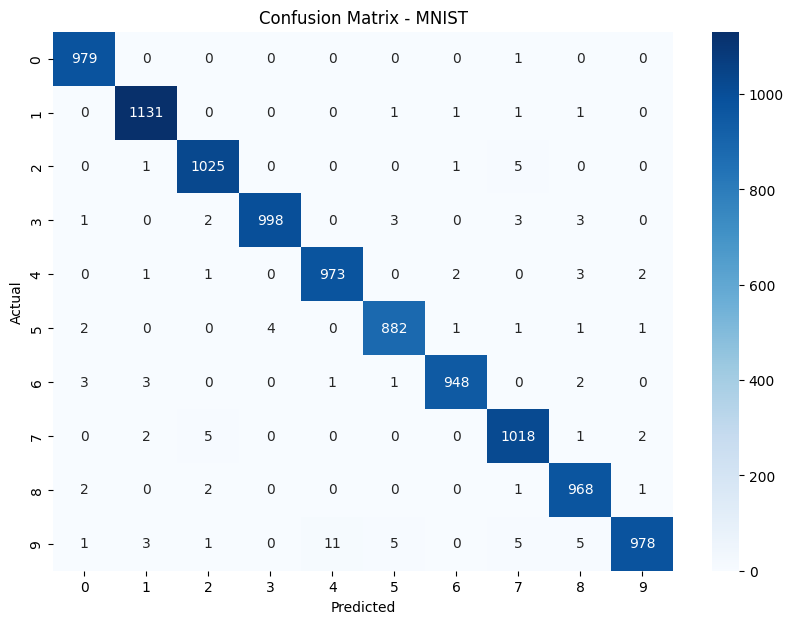

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


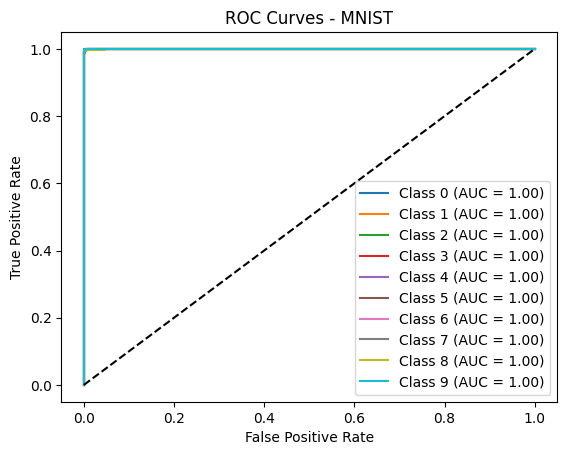

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with 80-20 split
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print("Accuracy:", report['accuracy'])
print("Precision:", report['weighted avg']['precision'])
print("Recall:", report['weighted avg']['recall'])
print("F-Measure:", report['weighted avg']['f1-score'])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - MNIST")
plt.show()

# ROC & AUC
y_test_bin = keras.utils.to_categorical(y_test, 10)
y_pred_prob = model.predict(x_test)

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves - MNIST")
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.2998 - loss: 1.8640 - val_accuracy: 0.5169 - val_loss: 1.3412
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 87ms/step - accuracy: 0.5312 - loss: 1.3004 - val_accuracy: 0.5902 - val_loss: 1.1556
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6107 - loss: 1.1111 - val_accuracy: 0.6415 - val_loss: 1.0254
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6576 - loss: 0.9845 - val_accuracy: 0.6647 - val_loss: 0.9478
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 89ms/step - accuracy: 0.6855 - loss: 0.8998 - val_accuracy: 0.6918 - val_loss: 0.8745
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.7114 - loss: 0.8230 - val_accuracy: 0.6992 - val_loss: 0.8784
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7305 - loss: 0.7705 - val_accuracy: 0.7013 - val_loss: 0.8647
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7492 - loss: 0.7239 - 

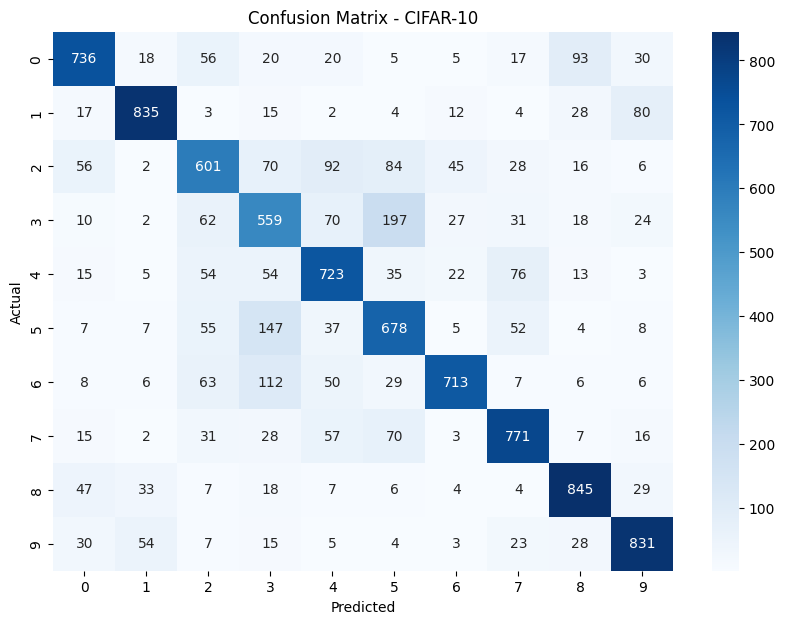

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Predict on test data
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test_flat = y_test.flatten()  # Flatten y_test to match shape of y_pred

# Classification Report
report = classification_report(y_test_flat, y_pred, output_dict=True)
print("Accuracy:", report['accuracy'])
print("Precision:", report['weighted avg']['precision'])
print("Recall:", report['weighted avg']['recall'])
print("F-Measure:", report['weighted avg']['f1-score'])

# Confusion Matrix
cm = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - CIFAR-10")
plt.show()
